# **BAYESIAN MODELS**

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sps
import scipy.integrate as spi
import scipy.special as spsc
import scipy.optimize as spo

import matplotlib.pyplot as plt


## **Contents**

1. Basic bayes

      a. Bayes theorem

      b. Bayesian statistics

      c. Using prior knowledge


2. Bayesian observers

      a. Neural orientation likelihoods

      b. Cardinal prior

      c. Biological implementation



## Part 1: Basic Bayes

### 1a. Bayes Theorem

Bayes' theorem looks rather simple:

\begin{align}
 p(A|B) = \frac{p(B|A) p(A)} {p(B)}
\end{align}

\\
The probability of A given B is equal to the probability of B given A multiplied by the probability of A, divided by the probability of B. But many people find this unintuitive, generating what's known as base-rate neglect (Kahneman & Tversky, 1973). The typical example is:

*Suppose that 0.1% of all people in a population carry a virus. A
diagnostic test for this virus detects it in 100% of the people who have the virus, but also gives false alarms on 5% of the people who do not have the virus. What is the chance that a person with a positive test result actually has the virus?*

In a recent experiment (Stengard et al., Cognition, 2022) found the modal response was "95%" (~20% of participants).

Calculate the correct response using Bayes Theorem. Use A = "having the virus" and B = "testing positive"

In [1]:
# Define pA, the probability of having the virus


# Define pBA, the probability of testing positive given you have the virus


# Define pB, the probability of testing positive
# This is the sum of the 0.1% of the population who have the virus and will
# test positive, plus the 99.9% of the population who have a 5% chance of
# testing positive


# Apply Bayes theorem, pAB = (pBA*pA)/pB and print the result



Stengard et al., found just 9% of participants gave an answer between 1.8% and 2.2%, in line with previous studies, where the correct answer is given less than 20% of the time.

If you found that unintuitive, try another (Based on Bar-Hillel, 1980):

*In the city, 85% of cabs are blue and 15% are green. In a hit and run accident, an eye-witness identifies a green cab. The accident happened at night, and when tested, it was found the witness confuses blue and green at night 20% of the time. What is the chance the cab was green?*

A = "cab is green", B = "witness sees green"

In [2]:
# Define pA, the probability that the cab is green


# Define pBA, the probability that the witness reports a green cab is green


# Define pB, the probability that the witness reports a green cab, given either
# a green or a blue cab


# Apply Bayes and print the result


Correct answer: 41.38%

### 1b. Bayesian Statistics

The terms of Bayes theorem are often referred to as:
- the posterior $p(A|B)$,
- the likelihood $p(B|A)$,
- the prior $p(A)$, and
- the marginal likelihood $p(B)$.

Here we use the term 'likelihood'.

Note that probabilities have to add to 1: $p(A) = 1 - p({\displaystyle \neg }A)$, likelihoods do not.

In Bayesian statistics, we think about this in terms of data (e.g., a random variable $\boldsymbol{x}$) and model parameters $\theta$: We ask, *what is the probability of the model parameter, given the data, $p(\theta | \boldsymbol{x})$?*

For example, what is the probability of the null hypothesis that the mean is 0? Which is calculated as the probability of the data given the model parameter $p(\boldsymbol{x}|\theta)$, multiplied by the prior probability of model parameter $p(\theta)$. Therefore, Bayes theorem in the context of parameter estimation is

\begin{align}
 p(\theta|\boldsymbol{x}) = \frac{p(\boldsymbol{x}|\theta) p(\theta)} {p(\boldsymbol{x})}
\end{align}


\\


Simple example: We observe N = 50 samples of data $\boldsymbol{x}$, which have been sampled from a Gaussian with a true mean $\mu = 0$ and standard deviation $\sigma = 1$: $\boldsymbol{x} \sim \mathcal{N}(0, 1)$. Our parameters are $\theta = \{\mu, \sigma \}$.

\\

Use `sps.norm.rvs(loc=mu, scale=sigma, size=N)` to take 50 samples of data.

In [ ]:
# take 50 random samples from a Normal distribution




 Assume we know the true standard deviation is 1, but we're unsure about  the true mean: it could be anywhere between -1 and 1, with equal likelihood (uniform/uninformative prior).

In [ ]:
# Prior function: A function of mu that uses sps.uniform.pdf to calculate the
# likelihood of mu under the prior uniform distribution; location = -1, scale = 2
def uniform_prior(mu):

    prior = sps.uniform.pdf(x=mu, loc=-1, scale=2)

    return prior


# Likelihood function: returns the likelihood of the data given mu. The input
# The likelihood function is a normal distribution: sps.norm.pdf with scale
# (sigma) fixed to 1 (because we are assuming we know the true standard deviation)
def likelihood(data, mu):

    lh = sps.norm.pdf(x=data, loc=mu, scale=1)

    return lh

The posterior can be calculated as proportional to the prior multiplied by the likelihood: $p(\theta | \boldsymbol{x}) \propto p(\theta) p(\boldsymbol{x} | \theta)$.

For now, ignore the marginal likelihood $p(\boldsymbol{x})$.

In [ ]:
# Define a function to return the posterior:
# uniform_prior(mu) * likelihood(data, mu)
# Hint: the posterior is the product over the data samples

def posterior_prod(mu, data):

    post = uniform_prior(mu) * likelihood(data, mu)

    return np.prod(post)

To visualise, make a histogram of the data and overlay distributions with 10 possible means.

In [ ]:
# Use np.linspace to take 5 possible means between -1 and 1


# For the x-axis, take 100 possible values between -4 and 4


# Plot a histogram of the observed data (use density=True)
plt.figure(figsize=(3,2), dpi=100)



# Overlay the expected distributions for each of the 5 possible mus
# You can use the likelihood function with data=xs (the x-axis values)



plt.xlabel('Data value')
plt.ylabel('Density')

Plot the prior, the likelihood, and the posterior, over 100 discrete possible means.

In [ ]:
# Define a new x-axis, which is 100 possible mus evenly spaced between -1 and 1
mus = np.linspace(-1, 1, 100)


fig = plt.figure(figsize=(6,6))
ax = fig.subplots(3, 1)
# On  subplot 1, plot the uniform prior function of mu



ax[0].set(xlabel='mu', ylabel='prior')

# On a second subplot, plot the likelihood of the data as a function of mu
# The likelihood is the product across data samples, so take the output of the
# likelihood function as a numpy array



ax[1].set(xlabel='mu', ylabel='likelihood')

# Calculate the posterior, using the functions, for each possible mu
post = np.array([posterior_prod(m, data) for m in mus])

# Plot on the third subplot

ax[2].set(xlabel='mu', ylabel='posterior')
plt.tight_layout()

What is the posterior probability of the null hypothesis that the mean
is 0?


In [ ]:
# Define pH0, the value of the posterior at mean = 0 and print the value



What is the posterior probability of alternative hypothesis 1: the mean is greater than 0 (up to 1)?

For this, we could do some math (integrate over values from 0 to 1), but in reality we're often faced with more complicated problems that don't have simple mathematical solutions... We can use numerical integration to estimate the probability density under the posterior from 0 to 1. Use the function `spi.quad(function, a, b)` to integrate the posterior from a=0 to b=1. An easy way to pass the function

In [ ]:
# Calculate pH1 using spi.quad, and the posterior function we already defined



Model comparison can be performed using Bayes factor:

\begin{align}
BF = \frac{p(H_0)}{p(H_1)}
\end{align}

In [ ]:
# Calculate BF and print the result



If this kind of comparison is our goal, we can safely ignore the
marginal likelihood term, probability of the data $p(\boldsymbol{x})$, because it is the same for $p(H_0)$ and $p(H_1)$.


### 1c. Using Prior Knowledge

What if we have some idea that the mean should be close to 0?

We can set the prior to a normal distribution, with a mean of 0 and a stantard deviation of 0.2


In [ ]:
# Define a new function for the prior, which is a gaussian distribution
# over possible mus, with location = 0 and scale = 0.2



# Define a new function for the prosterior, which is the same as before,
# but uses the new gaussian prior



To visualise, plot the two priors, likelihood, and the two different posteriors in the same manner as before

In [ ]:
# Make a new figure with 3 subplots

fig = plt.figure(figsize=(6,6))
ax = fig.subplots(3, 1)

# On the first subplot, plot the uniform prior as before, and the new gaussian prior
# (Use different colours)


ax[0].set(xlabel='mu', ylabel='prior')

# On the second subplot, plot the likelihood as before


ax[1].set(xlabel='mu', ylabel='likelihood')

# plot the previous posterior, and overlay the new posterior




# use the right-hand y-axis, as there is a big difference in the posterior


ax[2].set(xlabel='mu', ylabel='posterior')

plt.tight_layout()

In [ ]:
# what is the likelihood of the null hypothesis that the mean is 0?



# Use spi.quad to estimate the likelihood of the alternative hypothesis as before


# Print Bayes Factor


You should see that the posterior is now closer to 0 and has a tighter range: using a more specific prior increases accuracy and decreases uncertainty (so long as the prior is valid).

Bayes Factor is also much larger, indicating greater evidence in favour of the null hypothesis.

If you want, try changing the prior to be centred on mu = 0.1, and see what happens to the posterior and Bayes Factor.

\\

Things can get more complicated: we're often dealing with uncertainty across multiple parameters. Say we didn't know the standard deviation, then we would have to marginalise this out to look at the posterior mean. Marginalising is another integral, we would end up with:

\begin{align}
p(H_1|\boldsymbol{x}) = \int{ \int{ p(\boldsymbol{x}|\mu,\sigma)p(\sigma)p(\mu)d\sigma} d\mu}
\end{align}

As things get more complicated, we can switch the MCMC to estimate the integral. This is a problem for another day.

A great introduction to the MCMC approach:
van de Schoot, R., Depaoli, S., King, R., Kramer, B., Märtens, K., Tadesse, M. G., ... & Yau, C. (2021). Bayesian statistics and modelling. Nature Reviews Methods Primers, 1(1), 1.

More on Bayesian hypothesis testing:
Kruschke, J. (2014). Doing Bayesian data analysis. A tutorial with R:
JAGS, and Stan. Elsevier Science.
AKA "The puppy book"


## Part 2: Bayesian Observers

### 2a. Neural Orientation Likelihoods

Bayes is the ***'optimal'*** way to use what we know about previous 'states of the world' to have better estimates of current 'states of the world', as well as reducing our uncertainty.

Perception is a fundamental example of a useful application of Bayes: we do not have direct access to any 'truth' of the world around us, only noisy estimates from indirect measures (light, sound, et cetera).

Perception is the result of a decision about the most likely cause of the noisy and ambigous sensory evidence, which is additionally disrupted by our own noisy perceptual processes.

Using Bayes, this can be framed as taking the maximum likelihood of our
posterior estimate of the cause of our sensations:

\\

\begin{align}
p(cause | sensations) = \frac{p(sensations | cause)p(cause)} { p(sensations)}
\end{align}

\\

A basic example is in perceiving the orientation of a line.

V1, the first cortical step of visual processing, contains neurons whose firing rates are a function of orientation. Specifically, firing rate is modulated according to a circular gaussian (Von Mises) distribution, with a certain mean, mu, and concentration, kappa (~ inverse variance).





In [ ]:
# Von Mises Distribution:
# x and mu are in radians (not degrees)
def vmdist(x, kappa, mu):

    pdf = (1 / (np.pi * spsc.i0(kappa))) * np.exp(kappa * np.cos(2 * (x - mu)))

    return pdf


Let's pretend V1 has 18 neurons, whose firing rates are tuned according to distributions with means equidistant across the full 180 degrees of possible orientations.

Plot the firing rates of the 18 neurons as a function of presented orientation

In [ ]:
nneurons = 18

# Define v1mus as linearly spaced between 0 and pi radians (180 degrees)


# Von Mises concentration parameter
kappa = 3.65  # estimating fwhm of about 70 degrees, similar to real V1 neurons

# To plot, use an even sampling of 180 possible presented orientations, between 0 and pi
# Define oris, the samples of possible presented orientations (in radians)


# Create an array of the firing rates as a function of presented orientations
# for the 18 neurons, where each row is a neuron
# Use the Von Mises distribution function defined above


# Plot the firing rate of each neuron as a function of presented orientation
fig, ax = plt.subplots()



ax.set(xlabel='Presented Orientation', ylabel='Firing rate')

Neuron spike counts tend to be poisson distributed, the plot shows something proportional to mean firing rate (in response to each presented orientation), the mean is also proportional to the variance (because it's a poisson).

You should see from the plot that the firing rate of any one neuron is ambiguous with respect to which orientation was presented. For example, if the neuron maximally tuned to 90 degrees (cyan if using default colours) were firing at 0.8 of its maximal rate, this could be due to a presented orientation of either ~80 degrees or ~110 degrees.




The log-likelihood of the stimulus orientation given the neuron's spike count can be estimated as the spike count multiplied by the log of the firing rate function (Seung & Sompolinsky, 1993; Jazayeri & Movshon, 2006).

The estimate of the orientation will be the maximum a posteriori likelihood (**MAP**).


\\


Note: working with log probability is easier than working with probability

Reminder:

$log(p(A)p(B)) = log(p(A)) + log(p(B))$

$log(p(A)/p(B)) = log(p(A)) - log(p(B))$

\\

So if we want to calculate the log-likelihood of the presented orientation given the response of all neurons we can *sum* the log likelihoods across all neurons.


In [ ]:
# We are going to estimate the MAP orientation based on the average
# firing rates of our 18 neurons, in response to 10 test orientations
ntest = 10

# Define the test orientations as linearly spaced between 0 and pi



# The average posterior log likelihood is the log of the firing rate function
# multiplied by the firing rate, summed over the neurons
# Calculate the averate posterior log likelihood for each presented test orientation
# (the posterior log likelihood distributed over the possible orientations defined above)


# Find the location of the maximum posterior log likelihood for each test orientation
# using np.argmax


# The average MAP orientation is the possible orientation corresponding to
# the location of the MAP



Plot the average posterior log likelihood for each test orientation and scatter the maximum a posteriori

In [ ]:
# Create a figure
fig, ax = plt.subplots()

# For each test orientation

    # Plot the average posterior log likelihood across possible orientations

    # scatter the average MAP orientation by max post log likelihood

    # for comparison, plot lines showing the test orientations


ax.set(xlabel='Orientation', ylabel='Log posterior')


This is the expected average MAP, given the firing rate functions.

We can also simulate the neuron firing rates, to examine variability in the MAP orientation over multiple presentations of the test orientations.


In [ ]:
# General function to get simulated neural MAP
def simMAP(test_oris,possible_oris,v1mus,kappa,v1fr,prior,nsim):

    nneurons = v1mus.shape[0] # the number of neurons
    ntest = test_oris.shape[0] # the number of test orientation

    MAP = np.zeros((ntest,nsim))

    # for each test orientation
    for ti in range(ntest):

      # posterior log likelihood is summed over all neurons
      post = np.zeros((nsim, 180))

      for ni in range(nneurons):

          # the mean firing rate in response to the test orientation
          fr = vmdist(test_oris[ti], kappa, v1mus[ni])

          # The simulated firing rates, drawn from a poisson with mean = fr
          post += sps.poisson.rvs(fr, size=(nsim, 1)) * np.log(v1fr[ni]) + np.log(prior)

      # get the MAP orientations for each test orientation
      MAP[ti] = oris[np.argmax(post, axis=1)]


    return MAP



Use this function, assuming a uniform prior over the possible orientations, to generate 100 simulated MAP orientations.


In [ ]:
# Define the prior as equiprobable across the 180 possible orientations


# use the function above to generate 100 simulate MAP orientations for each
# test orientation


# Create a scatterplot of the actual test orientations against the simulated MAP
# orientations
fig, ax = plt.subplots()


# also plot the average of the simulated MAP orientations


ax.set(xlabel='True orientation', ylabel='Inferred orientation')

### 2b. Cardinal Prior

In the real world, we are more likely to encounter orientations close vertical and horizontal (the 'Cardinal' orientations; Girshick, Landy, & Simoncelli, 2011).


This prior can be roughly described by:

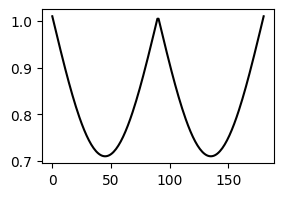

In [ ]:
# Linear spacing of possible orientations
oris = np.linspace(0, np.pi, 180)
# The prior peaks at 0, 90, and 180 degrees (horizontal and vertical)
prior_ori = (1 - np.abs(np.sin(2*oris)) * 0.3) + 0.01

plt.figure(figsize=(3,2), dpi=100)
plt.plot(oris*180/np.pi,prior_ori, 'k')

We can look at the effect of this prior on the average estimate by adding it to the mean posterior (multiplied by the number of neurons)
since $log(p(A)*p(B)) = log(p(A)) + log(p(B))$

Add the prior, recalculate the average MAP and plot.


In [ ]:
# Define a second average posterior log likelihood by adding the log of the
# prior likelihood (x nneurons) to the average posterior calculated earlier


# Calculate the new MAP orientation, using the armax location of the MAP as before



Plot the new posterior likelihood functions for each test orientation as before, scattering the MAP and marking the true test orientations.

It might help to visualise the log prior and the firing rates in subplots above this.

In [ ]:
# Plot the log prior in the first subplot
# and the firing rates in the second

fig = plt.figure(figsize=(8,8))
ax = fig.subplots(3, 1)

# plot prior


# plot fr

ax[1].set(xlabel='Orientation', ylabel='firing rate')

# plot log posterior for each test orientation,

    # plot the posterior log likelihood


    # scatter the MAP orientation


    # plot the true test orientations for comparison


ax[2].set(xlabel='Orientation', ylabel='log posterior')

plt.tight_layout()

You should see that the estimated orientations are pulled toward the cardinal orientations. Why would this be helpful?

Simulate again, and plot the estimated against the true orientation


In [ ]:
# Use the simMAP function again to simulate 100 MAP orientations resulting the
# test orientations with this new prior


# Scatter the simulations against the true orientation
fig, ax = plt.subplots()




ax.set(xlabel='True orientation', ylabel='Inferred orientation')

You should see both a bias toward horizontal (0/180 degrees) and vertical (90 degrees), as well as the estimates being more precise around horizontal/vertical (less spread in the scatter points). This means that perception is more precise for orientations we encounter more often.

These are both properties reflected in human behavioural responses to
orientations (Wei & Stocker, 2015) and in BOLD responses to orientations (Patten, Mannion, & Clifford, 2017). (These two references also point to a more complex implementation via principles of 'efficient encoding', for those interested to read further).


### 2c. Biological implementation

How is this implemented in the brain? Do we actually track and represent priors? Or is there some way this can
be implemented in a feedforward manner?

Re-arrange the neurons so that they are spaced according to the prior (a bit more dramatic than the current prior), and plot the firing rate functions


In [ ]:
# To space the neurons according to the prior, we can create a cumulative probability function of the prior
thisp = np.cumsum((1 - np.abs(np.sin(2*oris)) * 0.8)) / np.sum((1 - np.abs(np.sin(2*oris)) * 0.8))

# And find samples equidistant in cumulative probability
ip = np.linspace(0.001, 0.999, nneurons)

# Place the prior means about there
v1mus_prior = np.zeros(nneurons)
for ni in range(nneurons):
    thisi = np.where(thisp >= ip[ni])[0][0]
    v1mus_prior[ni] = oris[thisi]

# Create a new array of firing rates for these neurons


# plot the firing rate over possible orientations for each neuron
fig, ax = plt.subplots()



ax.set(xlabel='Orientation', ylabel='Firing rate')

Recalculate the mean posterior, simulate responses and plot (as above)

In [ ]:
# The average posterior log likelihood is the log firing rate (of the prior
# distributed neurons) multiplied by the average firing rate in response to the
# test orientations, summed across neurons


# The MAP orientations, based on the location of the max posterior


# plot the postior log likelihood and MAP orientations as before
fig, ax = plt.subplots()




ax.set(xlabel='orientation', ylabel='log posterior')

In [ ]:
# Use the simMAP function again to simulate 100 MAP orientations resulting the
# test orientations with the neurons distributed this way, but inputting a
# uniform / uninformative prior
prior = np.ones((1,180))/180


# scatter the MAP orientations against the true orientations as before
fig, ax = plt.subplots()




ax.set(xlabel='True orientation', ylabel='Inferred orientation')

You should see that having more neurons with tuning functions closer to horizontal/vertical has the same effect as the cardinal prior. The prior is now already built-in to the neural response.

Early work examining cat visual cortex has demonstrated a profound impact of early visual experience on the distribution of neuronal orientation tuning functions as well as sensitivity to orientations (Blackmore & Cooper,
1970; Hirsch & Spinelli, 1970; Hubel & Weisel, 1961).

An oversimplification: the brain builds priors into the neural tuning functions naturally, by developing more neural resources for operations that are used more often ("neurons that fire together wire together").
